<a href="https://colab.research.google.com/github/jeya014/Intelligent-Garbage-Classification-using-Deep-Learning/blob/main/nmD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


In [3]:
dataset = pd.read_csv(list(uploaded.keys())[0])

In [4]:
print("Dataset Overview:")
print(dataset.head())
print("\nSummary Statistics:")
print(dataset.describe())
print("\nMissing Values:")
print(dataset.isnull().sum())

Dataset Overview:
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7 

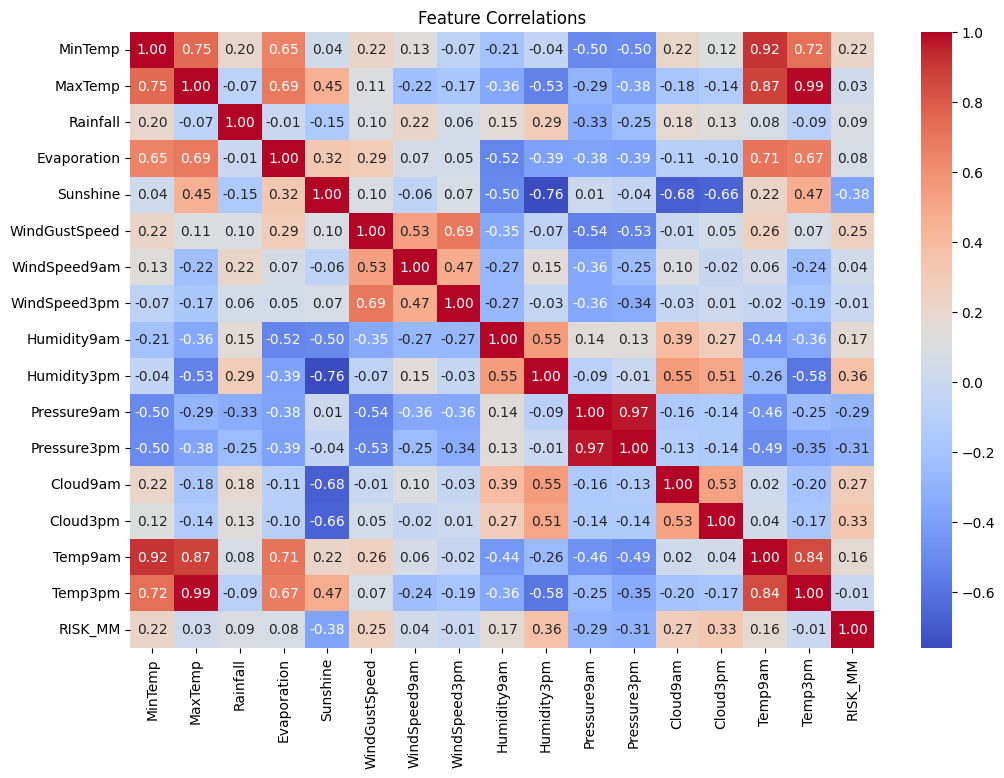

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [9]:
numeric_cols = dataset.select_dtypes(include=np.number).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].median())

In [10]:
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

<ipython-input-10-5f7e2a809d02>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [11]:
dataset['RainTomorrow'] = dataset['RainTomorrow'].map({'Yes': 1, 'No': 0})
dataset['RainToday'] = dataset['RainToday'].map({'Yes': 1, 'No': 0})

In [12]:
dataset = pd.get_dummies(dataset, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)


In [14]:
X = dataset.drop(['RainTomorrow'], axis=1)
y = dataset['RainTomorrow']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


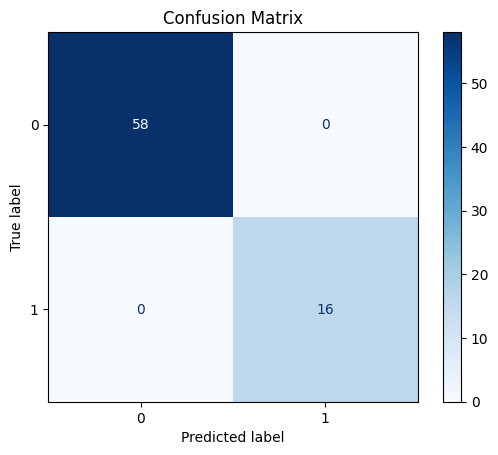

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


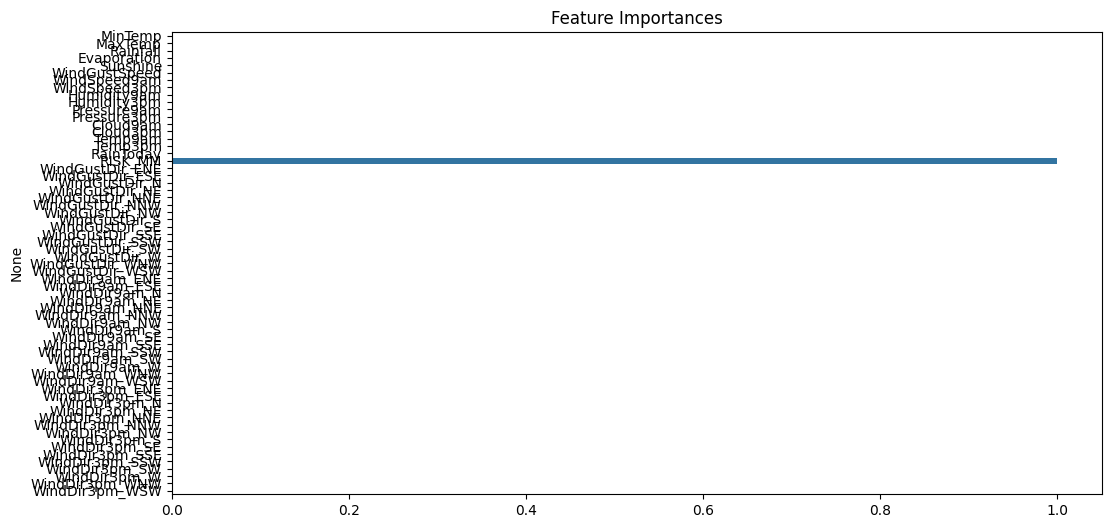

In [19]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.show()

In [20]:
import joblib
joblib.dump(model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']